    Pipeline Used:
       Stopwords-number removal 
       Lemmatizing 
       TF/IDF
       Feature selection Kbest
       Many algorithms.
    

In [2]:
import pandas as pd
import numpy as np
import re
import sklearn
import os
import json
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC 
import os
import pickle

In [3]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC #support vector classifier
from sklearn.linear_model import SGDClassifier
import numpy as np
import spacy
nlp = spacy.load('en_core_web_sm')
import os

# Import data

In [54]:
path=os.getcwd()
new_path=path.replace("2nd Pipeline notebooks","Data to use\\movie_data.csv")
new_path
df=pd.read_csv(new_path)


In [55]:
df.head()


,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


In [56]:
labels=df["sentiment"].copy() #capture targets
#df.drop(["Title","Sub-Domain","Domain","Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.1.1","Unnamed: 0.1.1.1"],axis=1,inplace=True)
#"Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.1.1"
print(df.columns)#
print(labels)

Index(['review', 'sentiment'], dtype='object')
0        1
1        0
2        0
3        1
4        0
5        1
6        1
7        1
8        1
9        1
10       0
11       1
12       0
13       0
14       1
15       0
16       0
17       1
18       0
19       1
20       0
21       0
22       0
23       0
24       0
25       1
26       0
27       1
28       0
29       1
        ..
49970    1
49971    0
49972    1
49973    1
49974    0
49975    1
49976    0
49977    1
49978    0
49979    1
49980    0
49981    0
49982    0
49983    1
49984    0
49985    0
49986    0
49987    0
49988    0
49989    0
49990    0
49991    0
49992    0
49993    1
49994    1
49995    0
49996    0
49997    0
49998    0
49999    1
Name: sentiment, Length: 50000, dtype: int64


In [57]:
print(df.columns)#
print(labels.unique())
print(labels.nunique())

Index(['review', 'sentiment'], dtype='object')
[1 0]
2


# Process text data

In [58]:
df.head(10)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0
5,Leave it to Braik to put on a good show. Final...,1
6,Nathan Detroit (Frank Sinatra) is the manager ...,1
7,"To understand ""Crash Course"" in the right cont...",1
8,I've been impressed with Chavez's stance again...,1
9,This movie is directed by Renny Harlin the fin...,1


# 1)Stopword removal

In [59]:
stop=stopwords.words('english') #Nltk stopwords
print(stop)
stop.append("Hi")  
stop.append("Hello")
stop.append("Hiya")
stop.append("hello")
stop.append("Anyone")
stop.append("All")
stop.append("I")
stop.append("hi")
stop.append("this")
stop.append("My")
stop.append("Everyone")
stop.append("everyone")
stop.append("Me")
stop.append("Im")
stop.append("Ive")
stop.append("We")
stop.append("thank")
stop.append("Thank")
stop.append("Would")
stop.append("would")
stop.append("Afternoon")
stop.append("There")
len(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

201

In [60]:
def is_number(s):  #Function helps removing numbers
    try:
        float(s)
        return True
    except ValueError:
        return False

In [61]:
#Define text-processing functions
translator = str.maketrans('', '', string.punctuation)
def tokenize(text):
    new_text=text.translate(translator)
    return [word for word in new_text.split()]

def stop_word_remove(text):
    return [w for w in tokenize(text) if w not in stop]



discarded_words=[]            
def stop_word_remove_and_numbers(text):
    list_of_tokens=tokenize(text) #Tokenize the string that came in as a string
    return_list=[]  #list to return 
    for token in list_of_tokens:
        if token.lower() not in stop and is_number(token)==False:
            return_list.append(token)
        else:
            #print(token)
            discarded_words.append(token)
    #return [w for w in tokenize(text) if w not in stop]
    return return_list 
    

In [62]:
intermidiate_frame=df["review"].apply(stop_word_remove_and_numbers)

# 2) Lemmatizing

In [63]:


def lemmatize(text): #SpaCy
    "Accepts string as input"
    
    joined=" ".join(text)
 
    return [token.lemma_ for token in nlp(joined)]
 

In [64]:
processed_Dataframe=intermidiate_frame.apply(lemmatize)
processed_Dataframe

0        [teenager, Martha, Moxley, Maggie, Grace, move...
1        [ok, really, like, Kris, Kristofferson, usual,...
2        [SPOILER, read, think, watch, movie, although,...
3        [people, see, wonderful, movie, -PRON-, be, su...
4        [recently, buy, dvd, forget, much, hate, movie...
5        [leave, Braik, put, good, show, finally, Zorak...
6        [Nathan, Detroit, Frank, Sinatra, manager, New...
7        [understand, Crash, Course, right, context, mu...
8        [-PRON-, have, impressed, Chavezs, stance, glo...
9        [movie, direct, Renny, Harlin, finnish, miracl...
10       [live, let, tell, do, not, foggyest, idea, hec...
11       [Hidden, Frontier, notable, longest, run, inte...
12       [ago, see, Sleuth, two, great, actor, Michael,...
13       [French, First, apparently, like, Jerry, Lewis...
14       [strange, movie, unlike, anything, make, west,...
15       [see, movie, strength, single, positive, revie...
16       [great, philosophical, question, purpose, life.

In [65]:
def join_to_string(text_list):
    return " ".join(text_list)

In [66]:
final_df=processed_Dataframe.apply(join_to_string)

In [67]:
final_df.head()

0    teenager Martha Moxley Maggie Grace move highc...
1    ok really like Kris Kristofferson usual easy g...
2    SPOILER read think watch movie although waste ...
3    people see wonderful movie -PRON- be sure thet...
4    recently buy dvd forget much hate movie versio...
Name: review, dtype: object

In [68]:
df["review"].head()

0    In 1974, the teenager Martha Moxley (Maggie Gr...
1    OK... so... I really like Kris Kristofferson a...
2    ***SPOILER*** Do not read this, if you think a...
3    hi for all the people who have seen this wonde...
4    I recently bought the DVD, forgetting just how...
Name: review, dtype: object

In [4]:
#load df
final_df=pd.read_excel("processed_data.xlsx")
labels=final_df["sentiment"].copy()

# Transform to word vectors--count vectors

In [5]:
vectorizer=TfidfVectorizer()
X_train, X_test, y_train, y_test = train_test_split(final_df["review"], labels, test_size=0.20, random_state=1,stratify=labels)

In [6]:
vectors_train=vectorizer.fit_transform(X_train)

In [7]:
vectors_test=vectorizer.transform(X_test) 
#Sparse matrix
vectors_test

<10000x148593 sparse matrix of type '<class 'numpy.float64'>'
	with 940002 stored elements in Compressed Sparse Row format>

# Feature selection

In [8]:
from sklearn.feature_selection import SelectKBest, chi2,mutual_info_classif

In [9]:
import scipy.sparse

In [10]:
selector=SelectKBest(mutual_info_classif, k=800)

reduced_vectors_train =selector.fit_transform(vectors_train, y_train)
print(reduced_vectors_train.shape)



(40000, 800)


In [11]:
reduced_vectors_train

<40000x800 sparse matrix of type '<class 'numpy.float64'>'
	with 2191388 stored elements in Compressed Sparse Row format>

In [12]:
reduced_vectors_test =selector.transform(vectors_test)

In [13]:
reduced_vectors_test

<10000x800 sparse matrix of type '<class 'numpy.float64'>'
	with 547362 stored elements in Compressed Sparse Row format>

# Initialize-fit the classifier - Test

In [14]:
classifier=LogisticRegression(random_state=1)
#Stritified results means that the proportion of the labels is kept in the test-set

In [15]:
classifier.fit(X=reduced_vectors_train,y=y_train)
classifier.score(X=reduced_vectors_test,y=y_test) #accuracy

C:\Users\billy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8534

In [16]:
predicted_labels=classifier.predict(reduced_vectors_test)
names=y_test.unique()

In [17]:
print(metrics.classification_report(y_test, predicted_labels,y_train.unique().sort()))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      5000
           1       0.84      0.88      0.86      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [18]:
metrics.confusion_matrix(y_test, predicted_labels)

array([[4138,  862],
       [ 604, 4396]], dtype=int64)

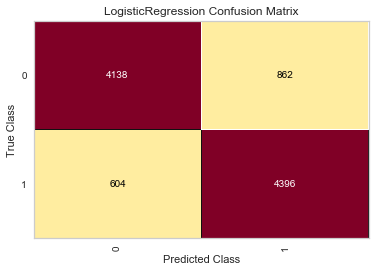

In [19]:
model = LogisticRegression(random_state=1)

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=y_train.unique())

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(reduced_vectors_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(reduced_vectors_test, y_test)

# How did we do?
cm.poof()

In [20]:
#training score
classifier.score(X=reduced_vectors_train,y=y_train) #accuracy

0.862825

In [21]:
predicted_labels=classifier.predict(reduced_vectors_train)
names=y_test.unique()

In [22]:
print(metrics.classification_report(y_train, predicted_labels,y_train.unique().sort()))
#training score end

              precision    recall  f1-score   support

           0       0.88      0.84      0.86     20000
           1       0.85      0.88      0.87     20000

    accuracy                           0.86     40000
   macro avg       0.86      0.86      0.86     40000
weighted avg       0.86      0.86      0.86     40000



# SVM using Gradient Descent

In [23]:
classifier_svm=SGDClassifier(loss='hinge', penalty='l2', random_state=1,max_iter=1000)

In [24]:
classifier_svm.fit(X=reduced_vectors_train,y=y_train)
classifier_svm.score(X=reduced_vectors_test,y=y_test)

0.851

In [25]:
predicted_labels=classifier_svm.predict(reduced_vectors_test)

In [26]:
print(metrics.classification_report(y_test, predicted_labels,y_train.unique().sort()))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      5000
           1       0.83      0.88      0.86      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



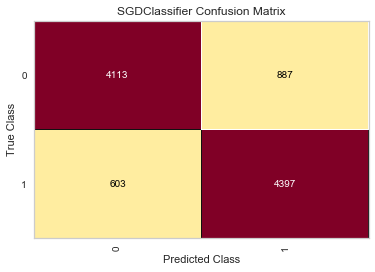

In [27]:
model = SGDClassifier(loss='hinge', penalty='l2', random_state=1,max_iter=1000)

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=y_train.unique())

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(reduced_vectors_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(reduced_vectors_test, y_test)
         
# How did we do?
cm.poof()

In [28]:
#training score
classifier_svm.score(X=reduced_vectors_train,y=y_train) 



0.85955

In [29]:
predicted_labels=classifier_svm.predict(reduced_vectors_train)
names=y_test.unique()

In [30]:
print(metrics.classification_report(y_train, predicted_labels,y_train.unique().sort()))
#training score end

              precision    recall  f1-score   support

           0       0.87      0.84      0.86     20000
           1       0.85      0.88      0.86     20000

    accuracy                           0.86     40000
   macro avg       0.86      0.86      0.86     40000
weighted avg       0.86      0.86      0.86     40000



# Kernel SVM 

In [36]:
from sklearn.svm import SVC
classifier_svm=SVC( kernel="poly", random_state=1,max_iter=1000)


In [37]:
classifier_svm.fit(reduced_vectors_train,y_train) #too slow

C:\Users\billy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\billy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=1000, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

In [38]:
classifier_svm.score(reduced_vectors_test,y_test)

0.4999

In [39]:
predicted_labels=classifier_svm.predict(reduced_vectors_test)
print(metrics.classification_report(y_test, predicted_labels,y_train.unique().sort()))

              precision    recall  f1-score   support

           0       0.44      0.00      0.00      5000
           1       0.50      1.00      0.67      5000

    accuracy                           0.50     10000
   macro avg       0.47      0.50      0.33     10000
weighted avg       0.47      0.50      0.33     10000



In [40]:
classifier_svm.score(reduced_vectors_train,y_train)

0.500425

In [41]:
predicted_labels=classifier_svm.predict(reduced_vectors_train)
print(metrics.classification_report(y_train, predicted_labels,y_train.unique().sort()))

              precision    recall  f1-score   support

           0       0.68      0.00      0.00     20000
           1       0.50      1.00      0.67     20000

    accuracy                           0.50     40000
   macro avg       0.59      0.50      0.33     40000
weighted avg       0.59      0.50      0.33     40000



In [42]:
classifier_svm=SVC(kernel="rbf", random_state=1,max_iter=1000)
classifier_svm.fit(reduced_vectors_train,y_train)
classifier_svm.score(reduced_vectors_test,y_test)

0.6351

In [43]:
predicted_labels=classifier_svm.predict(reduced_vectors_test)
print(metrics.classification_report(y_test, predicted_labels,y_train.unique().sort()))

              precision    recall  f1-score   support

           0       0.90      0.30      0.45      5000
           1       0.58      0.97      0.73      5000

    accuracy                           0.64     10000
   macro avg       0.74      0.64      0.59     10000
weighted avg       0.74      0.64      0.59     10000



In [44]:
classifier_svm.score(reduced_vectors_train,y_train)

0.6254

In [45]:
predicted_labels=classifier_svm.predict(reduced_vectors_train)
print(metrics.classification_report(y_train, predicted_labels,y_train.unique().sort()))

              precision    recall  f1-score   support

           0       0.91      0.28      0.43     20000
           1       0.57      0.97      0.72     20000

    accuracy                           0.63     40000
   macro avg       0.74      0.63      0.57     40000
weighted avg       0.74      0.63      0.57     40000



# Nb

In [31]:
classifierNB=MultinomialNB()

In [32]:
classifierNB.fit(X=reduced_vectors_train,y=y_train)
classifierNB.score(X=reduced_vectors_test,y=y_test)

0.8304

In [33]:
predicted_labels=classifierNB.predict(reduced_vectors_test)

print(metrics.classification_report(y_test, predicted_labels,y_train.unique().sort()))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      5000
           1       0.81      0.86      0.83      5000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



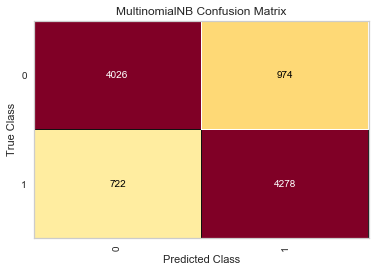

In [34]:
model = MultinomialNB()

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=y_train.unique())

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(reduced_vectors_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(reduced_vectors_test, y_test)

# How did we do?
cm.poof()

In [35]:
classifierNB.score(X=reduced_vectors_train,y=y_train)

0.83385

In [36]:
predicted_labels=classifierNB.predict(reduced_vectors_train)
print(metrics.classification_report(y_train, predicted_labels,y_train.unique().sort()))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83     20000
           1       0.82      0.85      0.84     20000

    accuracy                           0.83     40000
   macro avg       0.83      0.83      0.83     40000
weighted avg       0.83      0.83      0.83     40000

